# <p style="background-color:#00008B;color:white;font-size:150%;text-align:center;border-radius:10px 10px;height:70px;padding-top: 20px;"> Tiktok vs Spodify Top Hits 2022</p>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import warnings

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] =19

warnings.filterwarnings("ignore")

# <p style="background-color:#00008B;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">1. Cleaning Data</p>

In [100]:
df_spodify = pd.read_csv("datasets/spotify_top_charts_22.csv")
df_tiktok = pd.read_csv("datasets/TikTok_songs_2022.csv")
#checking for null values
df_spodify.isnull().sum()

uri                 0
artist_names        0
track_name          0
peak_rank           0
weeks_on_chart      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [101]:
df_tiktok.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

> 📌There are no missing values from the Spotify or the TikTok datasets. 

# <p style="background-color:#00008B;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">1. Exploratory Data Analysis</p>

In [102]:
print("There are {} Spodify songs and {} fields.".format(df_spodify.shape[0],df_spodify.shape[1]))
df_spodify.head()

There are 646 Spodify songs and 17 fields.


,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


In [103]:
print("There are {} TikTok songs and {} fields.".format(df_tiktok.shape[0],df_tiktok.shape[1]))
df_tiktok.head()

There are 263 TikTok songs and 18 fields.


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


> 📌Since there is 646 Spodify songs and 263 TikTok songs, we will take the top 200 from each. The Spodify dataset uses weeks_on_chart to measure populatiry where as the TikTok dataset uses track_pop. 

In [104]:
selected_spodify = df_spodify.sort_values(by="weeks_on_chart", ascending=False)[:200]
selected_tiktok = df_tiktok.sort_values(by="track_pop", ascending=False)[:200]

---
### What are the most popular tracks?

In [105]:
selected_spodify.head(5)

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
139,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,Shape of You,1,269,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.0,0.0931,95.977,4,233713
198,spotify:track:5uCax9HTNlzGybIStD3vDh,James Arthur,Say You Won't Let Go,7,268,0.358,0.557,10,-7.398,1,0.0590,0.6950,0.0,0.0902,85.043,4,211467
91,spotify:track:0pqnGHJpmpxLKifKRmU6WP,Imagine Dragons,Believer,16,268,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.0,0.0810,124.949,4,204347
150,spotify:track:0tgVpDi06FyKpA1z0VMD4v,Ed Sheeran,Perfect,4,262,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.0,0.1060,95.050,3,263400
397,spotify:track:6gBFPUFcJLzWGx4lenP6h2,Travis Scott,goosebumps,13,226,0.841,0.728,7,-3.370,1,0.0484,0.0847,0.0,0.1490,130.049,4,243837


In [106]:
selected_tiktok.head(5)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
5,Glimpse of Us,Joji,85,Glimpse of Us,97,0.440,0.317,-9.258,1,8,0.0531,0.891000,0.000005,0.1410,0.268,169.914,3,233456
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
52,Late Night Talking,Harry Styles,91,Harry's House,93,0.714,0.728,-4.595,1,10,0.0468,0.298000,0.000000,0.1060,0.901,114.996,4,177955
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365


---
### Is there any overlap between popular Spotify Songs and TikTok Songs?

In [107]:
# Extracting track names from each dataset
spodify_track_names = set(selected_spodify["track_name"])
tiktok_track_names = set(selected_tiktok["track_name"])

# Finding common track names
common_track_names = spodify_track_names.intersection(tiktok_track_names)
num = len(common_track_names)

# Displaying common track names
print(f"There are {num} Common track names between Spotify and TikTok:")
for track_name in common_track_names:
    print(track_name)

There are 46 Common track names between Spotify and TikTok:
Memories
love nwantiti (ah ah ah)
Astronaut In The Ocean
Heat Waves
Kiss Me More (feat. SZA)
Pepas
THATS WHAT I WANT
Need to Know
RAPSTAR
Woman
The Hills
Cold Heart - PNAU Remix
House of Memories
First Class
abcdefu
Freaks
Meet Me At Our Spot
1, 2, 3 (feat. Jason Derulo & De La Ghetto)
Beggin'
Another Love
As It Was
Talking to the Moon
Ain't Shit
You Right
The Business
Levitating (feat. DaBaby)
DÁKITI
Better Days (NEIKED x Mae Muller x Polo G)
Life Goes On
Peaches (feat. Daniel Caesar & Giveon)
Enemy (with JID) - from the series Arcane League of Legends
Todo De Ti
MONEY
good 4 u
The Motto
Dandelions
INDUSTRY BABY (feat. Jack Harlow)
Don't Start Now
Riptide
Sweater Weather
Counting Stars
Blinding Lights
STAY (with Justin Bieber)
Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit
About Damn Time
Without Me


> 📌The top 200 songs on Spotify and TikTok only share 46 common tracks.

---
### How do the different mood descriptions of the track influence the popularity?

<Axes: title={'center': 'Mood descriptions influence on Spotify Song Popularity'}>

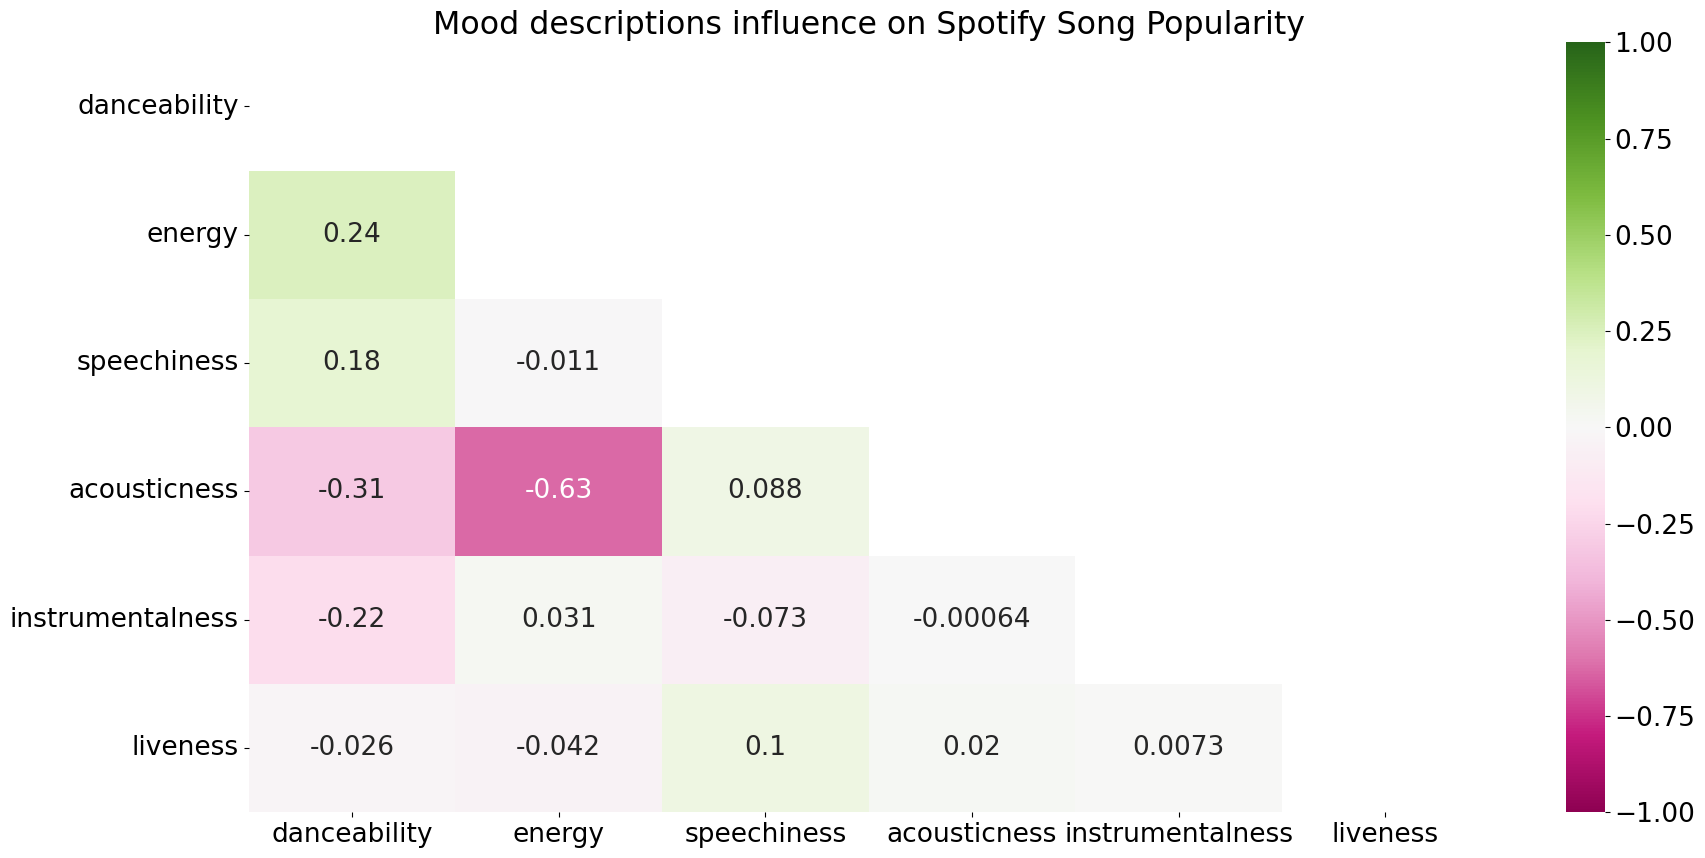

In [108]:
columns_mood = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness"]
mask = np.triu(np.ones_like(selected_spodify[columns_mood].corr(), dtype=bool))

plt.title("Mood descriptions influence on Spotify Song Popularity")
sns.heatmap(selected_spodify[columns_mood].corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'PiYG')

<Axes: title={'center': 'Mood descriptions influence on TikTok Song Popularity'}>

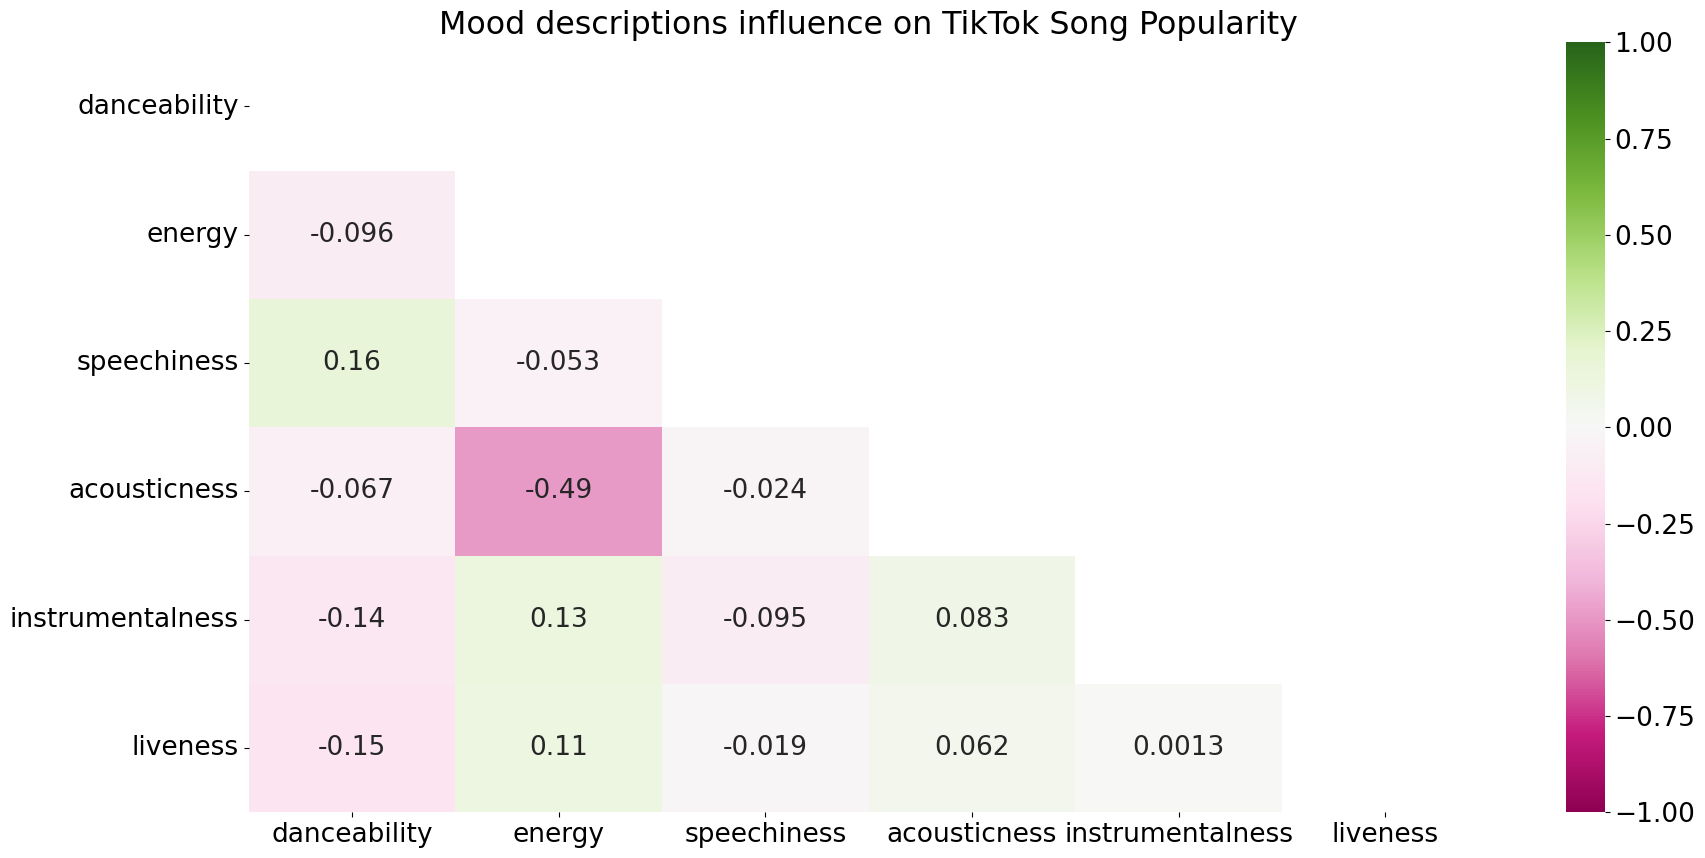

In [109]:
columns_mood = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness"]
mask = np.triu(np.ones_like(selected_tiktok[columns_mood].corr(), dtype=bool))

plt.title("Mood descriptions influence on TikTok Song Popularity")
sns.heatmap(selected_tiktok[columns_mood].corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'PiYG')

---

### Are the different accoustic characteristics of the track important for popularity?

<Axes: title={'center': 'Acoustic Characteristic influence on Spotify Song Popularity'}>

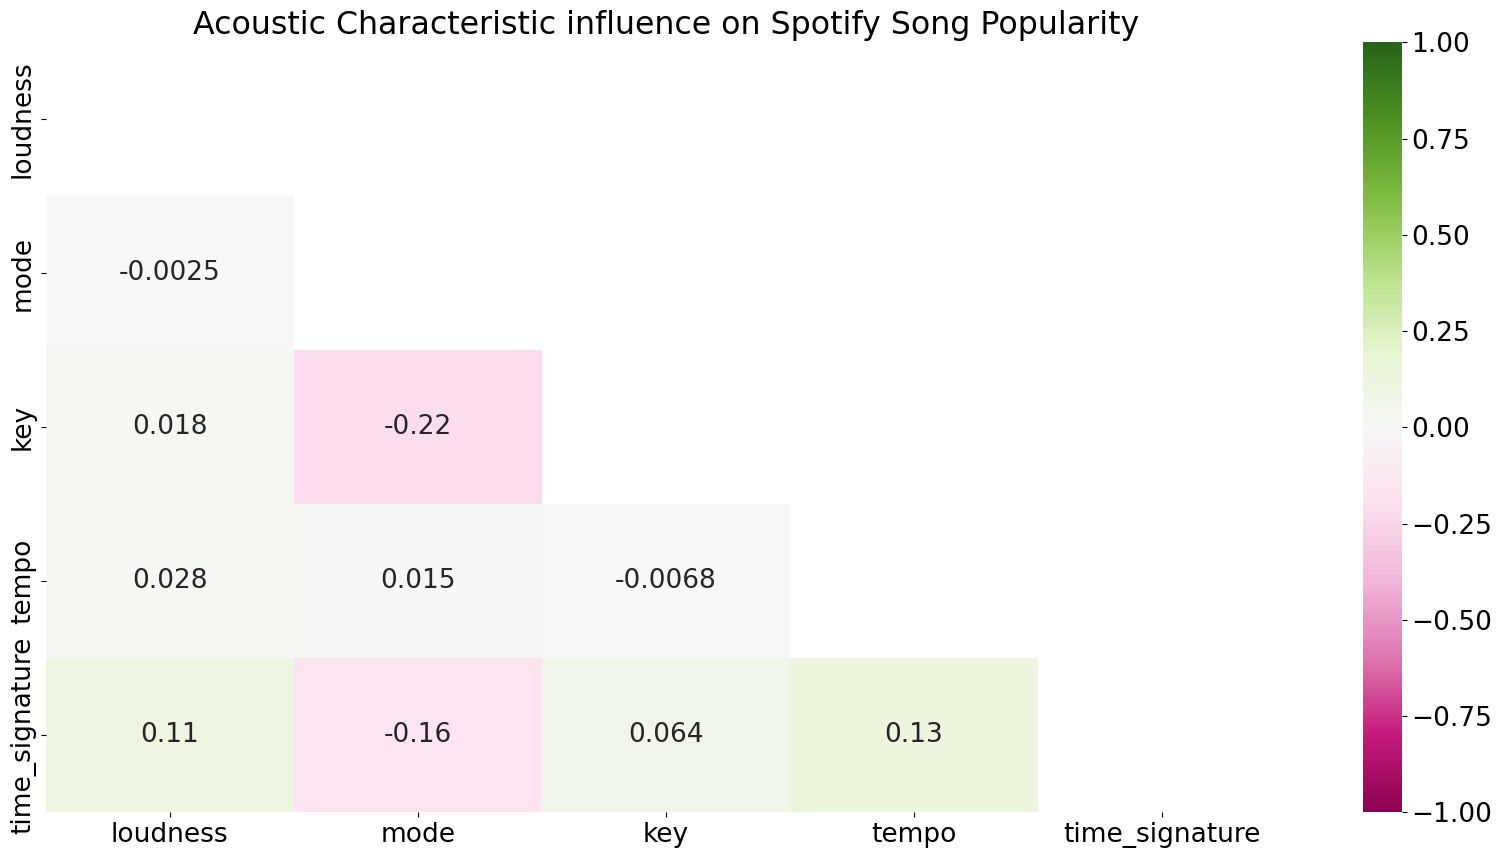

In [110]:
columns_acoustic = ["loudness", "mode", "key", "tempo", "time_signature"]

mask = np.triu(np.ones_like(selected_spodify[columns_acoustic].corr(), dtype=bool))
plt.title("Acoustic Characteristic influence on Spotify Song Popularity")
sns.heatmap(selected_spodify[columns_acoustic].corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'PiYG')

<Axes: title={'center': 'Acoustic Characteristic influence on TikTok Song Popularity'}>

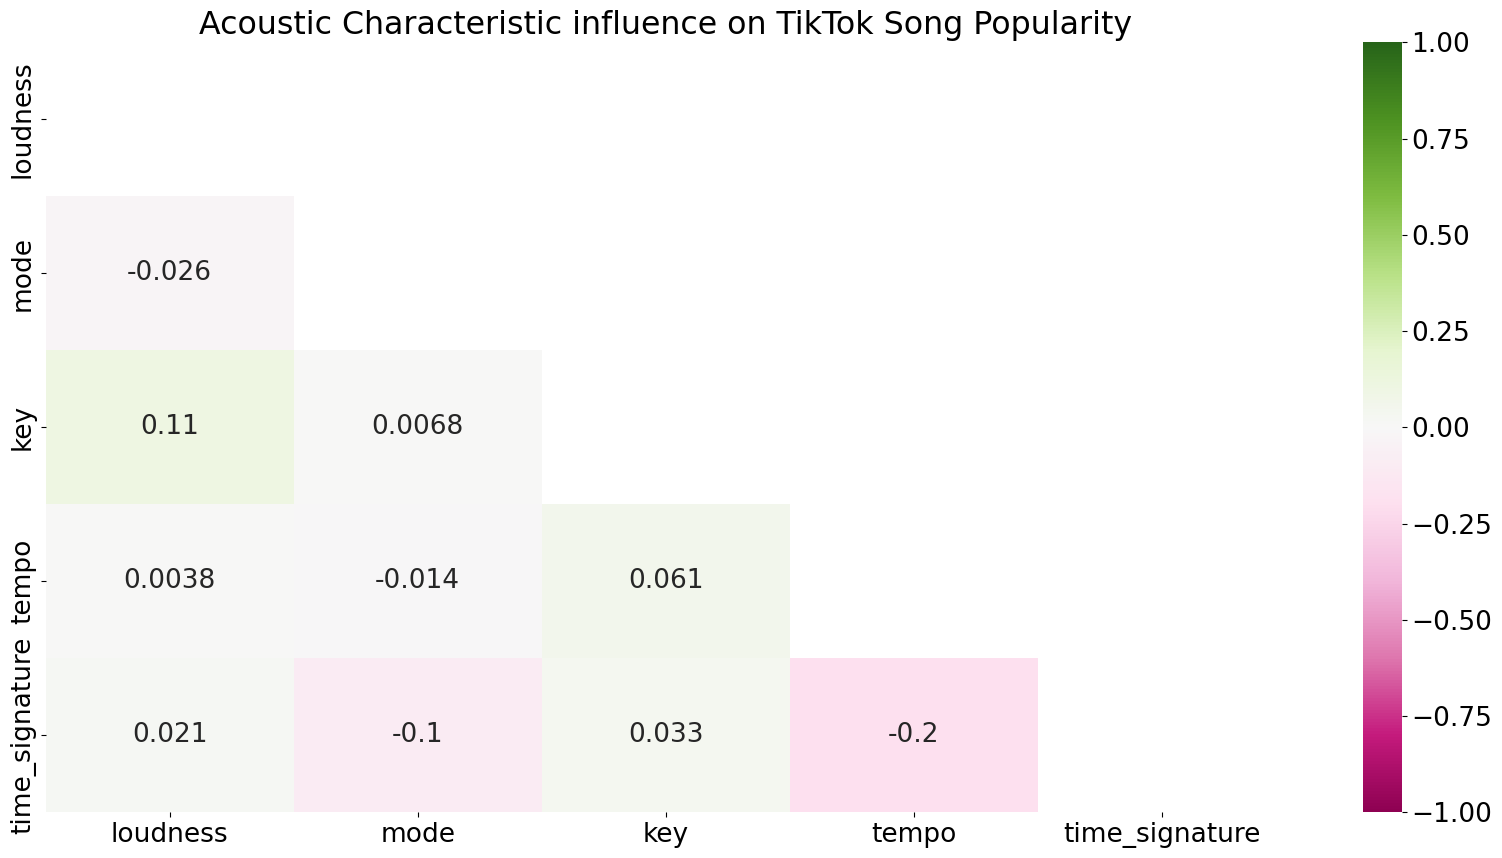

In [111]:
columns_acoustic = ["loudness", "mode", "key", "tempo", "time_signature"]

mask = np.triu(np.ones_like(selected_tiktok[columns_acoustic].corr(), dtype=bool))
plt.title("Acoustic Characteristic influence on TikTok Song Popularity")
sns.heatmap(selected_tiktok[columns_acoustic].corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'PiYG')

---

### Does the duration of the track influence its popularity?

<Axes: xlabel='duration_ms', ylabel='weeks_on_chart'>

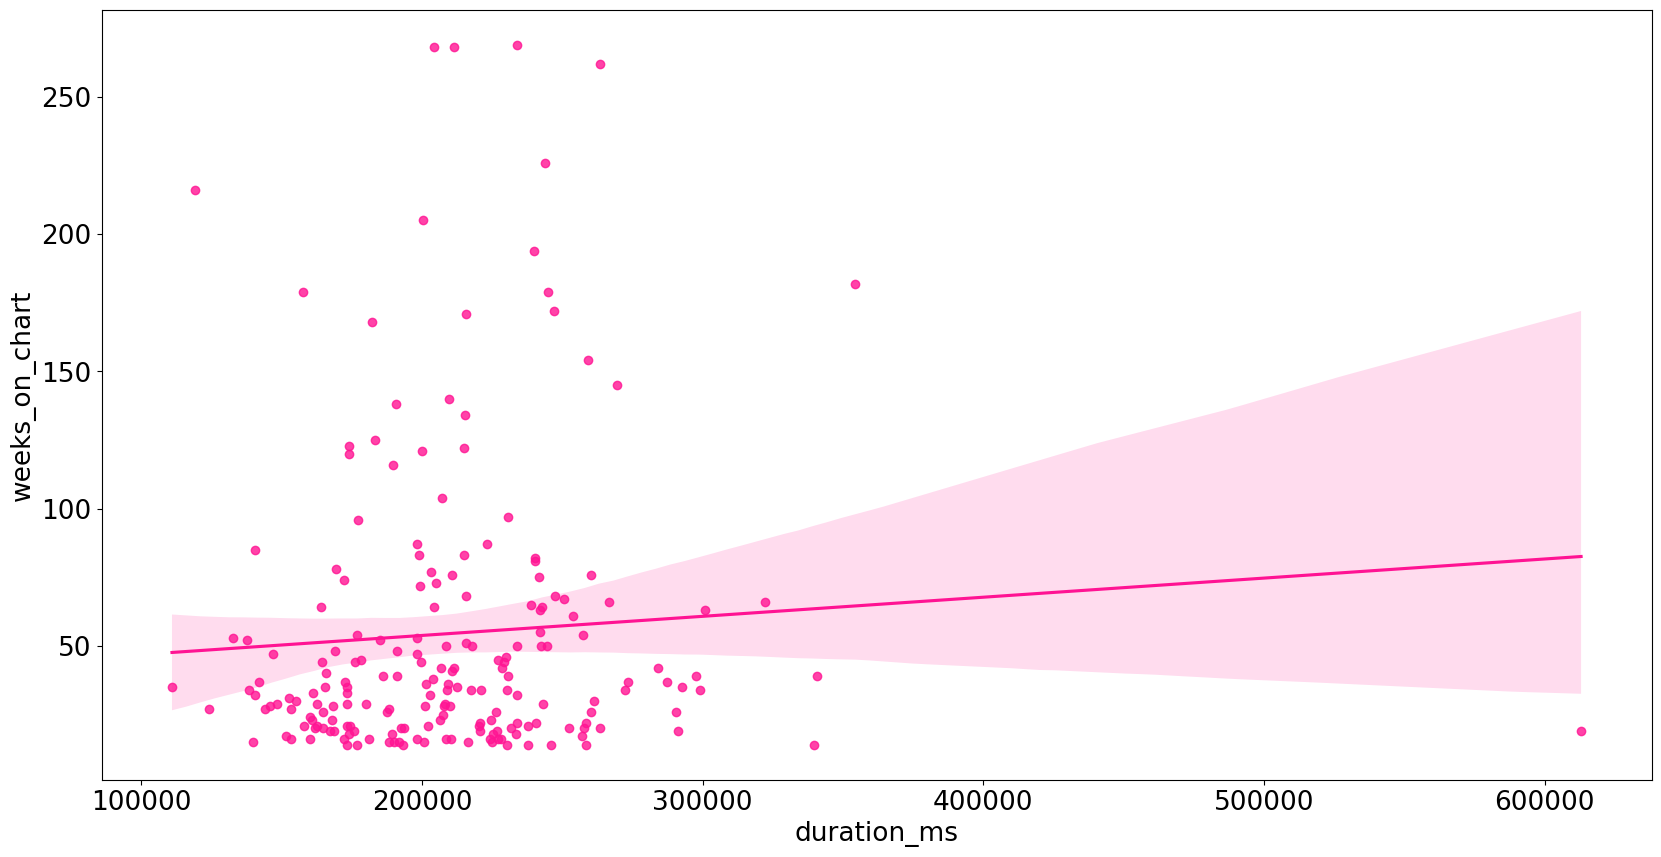

In [112]:
sns.regplot(x=selected_spodify["duration_ms"], y=selected_spodify["weeks_on_chart"], color='#FF1493')

<Axes: xlabel='duration_ms', ylabel='track_pop'>

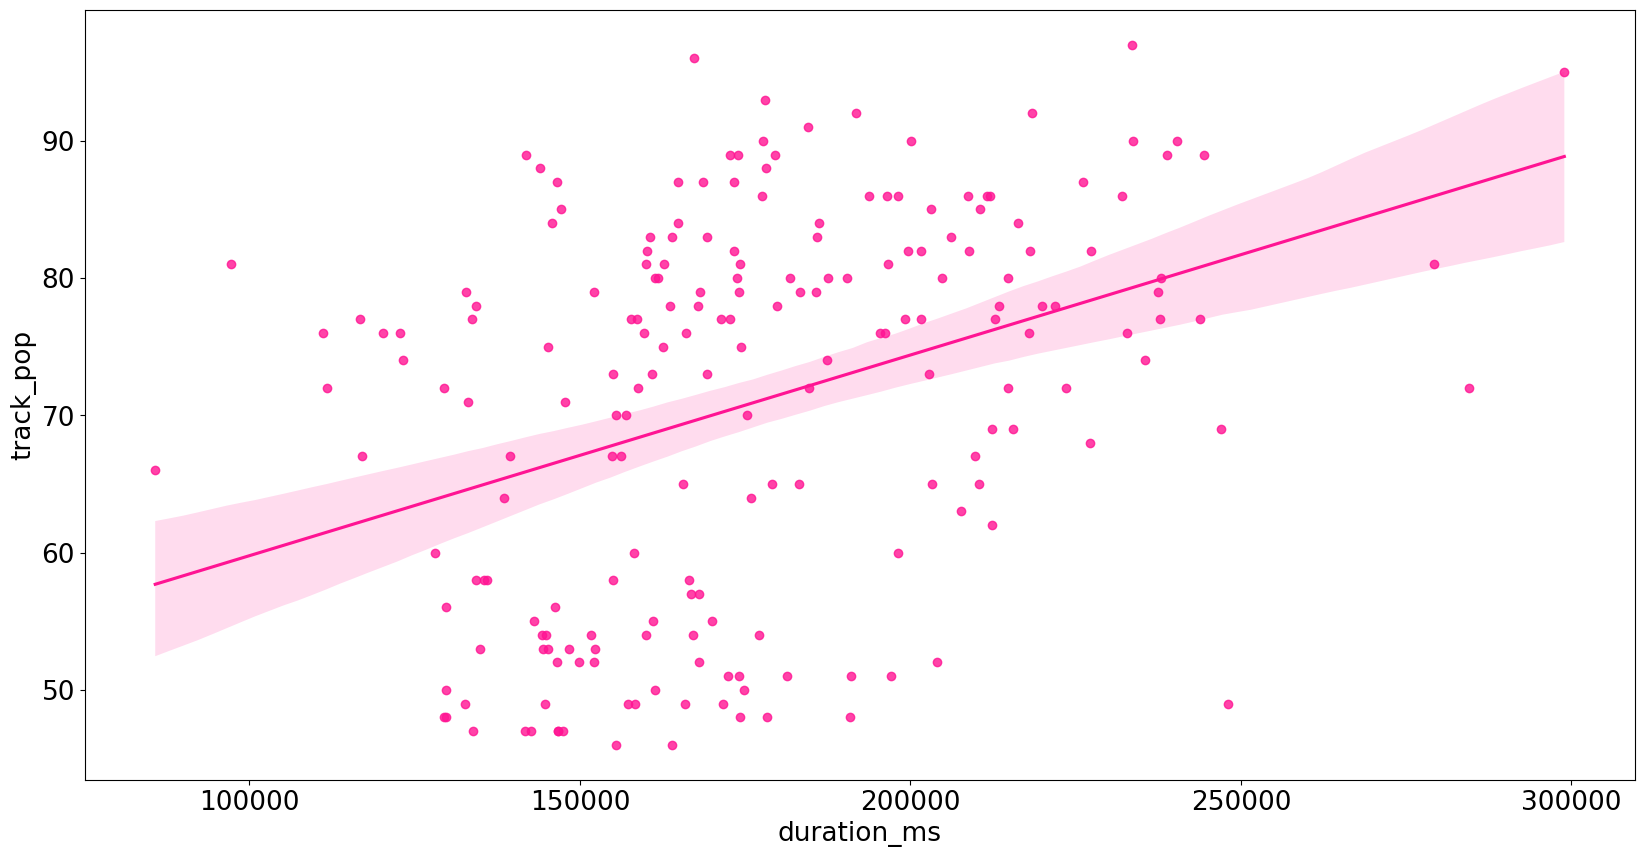

In [113]:
sns.regplot(x=selected_tiktok["duration_ms"], y=selected_tiktok["track_pop"], color='#FF1493')

# <p style="background-color:#00008B;color:white;font-size:100%;text-align:center;border-radius:10px 10px;">2. Creating Machine Learning Model</p>

---
### Training a machine learning model to predict if a song will be popular on Tiktok or Spodify or both platforms

In [114]:
##combine datasets and add a column named popularity_label
# Merge the datasets on the "track_name" column
selected_columns = ["track_name", "danceability", "energy", "speechiness", "acousticness",
                    "instrumentalness", "liveness", "loudness", "mode", "key", "tempo",
                    "time_signature", "duration_ms"]
dfs = selected_spodify[selected_columns]
dft = selected_tiktok[selected_columns]
merged_df = pd.concat([dfs, dft])
final_df = merged_df.drop_duplicates(subset="track_name").copy()

# Add a column named "popularity_label"
final_df["popularity_label"] = 0

# Set labels based on popularity on TikTok, Spotify, or both
final_df.loc[final_df.index.isin(selected_spodify.index), "popularity_label"] += 2  # Set to 2 for popular on Spotify
final_df.loc[final_df.index.isin(selected_tiktok.index), "popularity_label"] += 1  # Set to 1 for popular on TikTok
final_df.loc[final_df["track_name"].isin(common_track_names), "popularity_label"] += 3

# Display the resulting DataFrame
print(final_df)


               track_name  danceability  energy  speechiness  acousticness  \
139          Shape of You         0.825   0.652       0.0802       0.58100   
198  Say You Won't Let Go         0.358   0.557       0.0590       0.69500   
91               Believer         0.776   0.780       0.1280       0.06220   
150               Perfect         0.599   0.448       0.0232       0.16300   
397            goosebumps         0.841   0.728       0.0484       0.08470   
..                    ...           ...     ...          ...           ...   
205    One too Many Times         0.721   0.778       0.0459       0.00262   
195              The Boss         0.734   0.789       0.2430       0.08090   
203               Kiss Me         0.588   0.685       0.0624       0.37400   
211             Rather Be         0.706   0.895       0.1480       0.29900   
54        Warning / Signs         0.712   0.829       0.0300       0.08910   

     instrumentalness  liveness  loudness  mode  key    tempo  

In [115]:
# 1: popular on TikTok
# 2: popular on Spotify
# 3: popular on both platforms

# Define features and target variable
X = final_df.drop(["popularity_label", "track_name"], axis=1)
y = final_df["popularity_label"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier (you can choose a different classifier based on your needs)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.4788732394366197
Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.36      0.38        11
           2       0.36      0.21      0.27        19
           3       0.52      0.87      0.65        30
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        10

    accuracy                           0.48        71
   macro avg       0.26      0.29      0.26        71
weighted avg       0.38      0.48      0.41        71

